# Imports

In [1]:
import numpy as np
import scipy.io 
import pandas as  pd

In [2]:
import matplotlib.pyplot as plt

# DB

In [3]:
workingDir = 'C:/Cerebral/_MarioSandBox/DB/medicalHolography/vascular/Example/'
dataName = 'VTD_ready_for_ROI_choice.mat'
maskName = 'mask.mat'

In [4]:
def readData(fileLocationAndName,VariableName):
    data = scipy.io.loadmat(fileLocationAndName)
    data = data[VariableName]
    dataArray = np.array(data)
    return dataArray

In [5]:
data = readData(workingDir+dataName,'VTD_ready')
data.shape

(360L, 766L, 760L)

In [6]:
mask = readData(workingDir+maskName,'mask')
mask.shape

(760L, 766L)

# Data visualization
- [NiBabel: creating a file from array](https://stackoverflow.com/questions/28330785/creating-a-nifti-file-from-a-numpy-array)
- [NiBabel: Kaggle](https://www.kaggle.com/kmader/data-preview)

In [7]:
import nibabel as nib
from skimage.util.montage import montage2d

C:\Users\HP\Anaconda2\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [8]:
nifti_img = nib.Nifti2Image(data,np.eye(4))

In [9]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure

In [10]:
p = nifti_img.get_data()[::-1, ::2, ::2].swapaxes(1,2)

In [13]:
np.shape(p)

(360L, 380L, 383L)

In [37]:
pSlice = p[100]

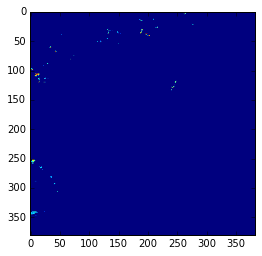

In [38]:
plt.imshow(pSlice)

In [14]:
subsetP = p[10:17,:,:]

In [15]:
cmap = plt.cm.get_cmap('nipy_spectral_r')

In [16]:
fig = plt.figure()

In [17]:
ax = fig.add_subplot(111, projection='3d')

In [22]:
verts, faces = measure.marching_cubes(subsetP, 0.0)

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.tools import FigureFactory as FF
from plotly.graph_objs import *

In [ ]:
def plotly_3d(verts, faces):
    x,y,z = zip(*verts) 
    
    print "Drawing"
    
    # Make the colormap single color since the axes are positional not intensity. 
#    colormap=['rgb(255,105,180)','rgb(255,255,51)','rgb(0,191,255)']
    colormap=['rgb(236, 236, 212)','rgb(236, 236, 212)']
    
    fig = FF.create_trisurf(x=x,
                        y=y, 
                        z=z, 
                        plot_edges=False,
                        colormap=colormap,
                        simplices=faces,
                        backgroundcolor='rgb(64, 64, 64)',
                        title="Interactive Visualization")
    iplot(fig)